In [1]:
import tensorflow as tf
from google.colab import drive 
drive.mount('/content/drive/')
import os
import zipfile
dataset_path = "/content/drive/MyDrive/nepali_notes.zip"
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")
zip_object.extractall("./")
zip_object.close()

Mounted at /content/drive/


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir='/content/nepali_notes/train'
valid_dir='/content/nepali_notes/valid'

 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator= train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    shuffle=True,
                                                   class_mode='categorical'
                                                     )

validation_generator  = test_datagen.flow_from_directory(directory=valid_dir,
                                                  target_size=(224, 224),
                                                  batch_size=20,
                                                  shuffle=False)

Found 14000 images belonging to 7 classes.
Found 2750 images belonging to 7 classes.


In [3]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
 
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.summary()

# # model 1
# model = Sequential()
# model.add(Conv2D(32,kernel_size=3, activation="relu",input_shape=(224,224,3)))
 
# model.add(MaxPool2D(strides=(2,2)))
 
# model.add(Conv2D(32,kernel_size=3, activation="relu",))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
 
# model.add(Conv2D(64,kernel_size=3, activation="relu",))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.1))
# model.add(Conv2D(64,kernel_size=3, activation="relu",))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.1))
# model.add(Conv2D(128,kernel_size=3, activation="relu",))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(128,kernel_size=3, activation="relu",))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# # model.add(Conv2D(256,kernel_size=3, activation="relu",))
# # model.add(BatchNormalization())
# model.add(MaxPool2D(strides=(2,2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(7,activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        3

In [4]:
rm -rf ./logs/

In [5]:
%load_ext tensorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

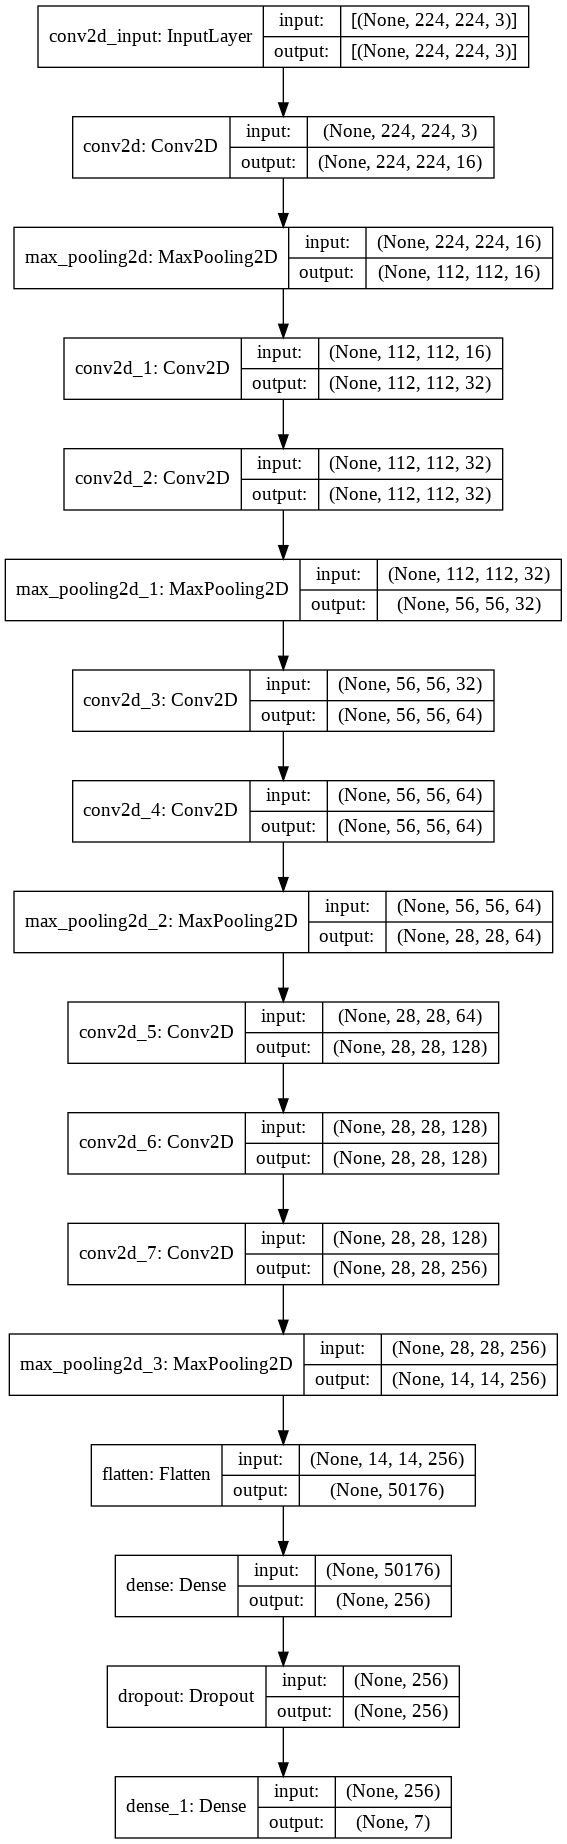

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [7]:
# conv_base.trainable=False
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['categorical_accuracy'])

In [ ]:
# checkpoint_cb=keras.callbacks.
history = model.fit_generator(generator=train_generator,
                                  epochs=40,
                                  validation_data=validation_generator,
                              callbacks=[tensorboard_callback]
                                  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
700/700 [==============================] - 448s 640ms/step - loss: 0.3728 - categorical_accuracy: 0.8692 - val_loss: 0.3953 - val_categorical_accuracy: 0.8615
Epoch 2/40
700/700 [==============================] - 443s 633ms/step - loss: 0.3649 - categorical_accuracy: 0.8722 - val_loss: 0.3448 - val_categorical_accuracy: 0.8793
Epoch 3/40
700/700 [==============================] - 442s 631ms/step - loss: 0.3687 - categorical_accuracy: 0.8713 - val_loss: 0.3462 - val_categorical_accuracy: 0.8793
Epoch 4/40
700/700 [==============================] - 446s 637ms/step - loss: 0.3497 - categorical_accuracy: 0.8759 - val_loss: 0.3157 - val_categorical_accuracy: 0.8909
Epoch 5/40
700/700 [==============================] - 446s 638ms/step - loss: 0.3548 - categorical_accuracy: 0.8756 - val_loss: 0.3346 - val_categorical_accuracy: 0.8829
Epoch 6/40
700/700 [==============================] - 447s 639ms/step - loss: 0.3473 - categorical_accuracy: 0.8777 - val_loss: 0.2964 - val_categoric

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('custom_arch.h5')

In [ ]:
history.history

In [ ]:
model.evaluate_generator(validation_generator)

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_pred.shape

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

In [ ]:
cm = confusion_matrix(validation_generator.classes, y_pred)

In [ ]:
print('Classification Report')
target_names = ['fifty', 'five', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
# Compute confusion matrix

 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = cm
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()